<a href="https://colab.research.google.com/github/woutervantol/scriptie1/blob/master/SCRIPTIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import time
from tensorflow import keras
import tensorflow as tf
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import make_axes_locatable
!pip install git+https://github.com/ehpor/hcipy.git
from hcipy import *
from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ehpor/hcipy.git to /tmp/pip-req-build-0gdjrprw
  Running command git clone --filter=blob:none --quiet https://github.com/ehpor/hcipy.git /tmp/pip-req-build-0gdjrprw
  Resolved https://github.com/ehpor/hcipy.git to commit 6aebeb901088b6a0a4549f7b6b9dbfc4454c042e
  Preparing metadata (setup.py) ... done
Mounted at /content/gdrive


#Utils

In [3]:
def split_pwfs_img(pwfs_img):
  pwfs_img = pwfs_img.reshape(len(pwfs_img), num_pwfs_pixels, num_pwfs_pixels)
  data = np.ndarray((len(pwfs_img), int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4))
  h = int(num_pwfs_pixels/2)
  data[:,:,:,0] = pwfs_img[:, :h, :h]
  data[:,:,:,1] = pwfs_img[:, h:, :h]
  data[:,:,:,2] = pwfs_img[:, :h, h:]
  data[:,:,:,3] = pwfs_img[:, h:, h:]
  return data

def get_rms(data):
  if len(data.shape) == 1:
    rms = np.sqrt(np.sum(data**2) / np.sum(aperture))
  elif len(data.shape) == 2:
    rms = np.sqrt(np.sum(data**2, axis=1) / np.sum(aperture))
  elif len(data.shape) == 3:
    print("let op: niet flattened")
    rms = np.sqrt(np.sum(data**2, axis=(1, 2)) / np.sum(aperture))
  else:
    print("Warning: er gaat hier iets mis")
  return rms

def modavg(modlist):
  avg = np.zeros(num_pwfs_pixels**2)
  for i in range(len(modlist)):
    avg += modlist[i].intensity / len(modlist)
  return avg / np.sum(avg)

def make_phase_abberation(rms):
  amplitude = rms
  if use_zernike:
    phase_aberration = make_power_law_error(pupil_grid, 1, telescope_diameter, exponent=-3, aperture=aperture)
    phase_aberration[aperture >= 0.5] -= np.mean(phase_aberration[aperture >= 0.5])
    phase_aberration = phase_aberration / get_rms(phase_aberration) * amplitude
    return phase_aberration
  else:
    aberration_modes = np.random.randn(num_actuators_across_pupil**2)
    phase_aberration = np.matmul(modes_to_wf, aberration_modes)
    phase_aberration[aperture==0] = 0
    phase_aberration = phase_aberration / get_rms(phase_aberration) * amplitude
    return phase_aberration

def makeData(rms):
  perfect_phase_abberation = make_phase_abberation(rms)
  perfect_wf = Wavefront(aperture * np.exp(1j * perfect_phase_abberation), wavelength_wfs)
  label_modes = np.matmul(wf_to_modes, perfect_phase_abberation)
  
  if use_modulation:
    mpwfs_wf = mpwfs.forward(perfect_wf)
    image = modavg(mpwfs_wf)
  else:
    image = pwfs.forward(perfect_wf).intensity
    image /= np.sum(image)
  
  return image.reshape(num_pwfs_pixels, num_pwfs_pixels), label_modes

# Choose modebasis


In [4]:
use_modulation = False
use_zernike = False

#these texts are used to easily import the right files below
if use_modulation:
  mod_text = "Mod"
else:
  mod_text = ""

if use_zernike:
  zernike_text = "Zernike"
else:
  zernike_text = ""

#Sync data

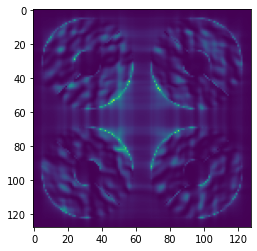

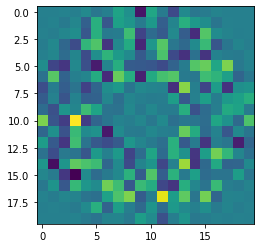

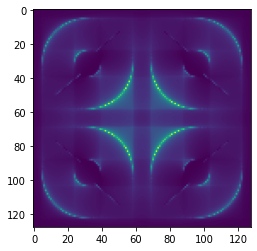

In [5]:
#Sync data with drive


#save data
# !cp /content/image_refMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/image_ref.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp -r /content/models/cnnmodel "/content/gdrive/MyDrive/MasterThesis/Data/"

# !cp /content/reconstructionMatrix.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainx.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainy.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testx.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testy.npy "/content/gdrive/MyDrive/MasterThesis/Data/"

# !cp /content/reconstructionMatrixMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainxMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainyMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testxMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testyMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"

# !cp /content/reconstructionMatrixZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainxZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainyZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testxZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testyZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"

# !cp /content/reconstructionMatrixModZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainxModZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainyModZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testxModZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testyModZernike.npy "/content/gdrive/MyDrive/MasterThesis/Data/"


image_ref = np.load("/content/gdrive/MyDrive/MasterThesis/Data/image_ref{}.npy".format(mod_text))
model = keras.models.load_model("/content/gdrive/MyDrive/MasterThesis/Data/cnnmodel")

matrix = np.load("/content/gdrive/MyDrive/MasterThesis/Data/reconstructionMatrix{}{}.npy".format(mod_text, zernike_text))
trainx = np.load("/content/gdrive/MyDrive/MasterThesis/Data/trainx{}{}.npy".format(mod_text, zernike_text))
trainy = np.load("/content/gdrive/MyDrive/MasterThesis/Data/trainy{}{}.npy".format(mod_text, zernike_text))
testx = np.load("/content/gdrive/MyDrive/MasterThesis/Data/testx{}{}.npy".format(mod_text, zernike_text))
testy = np.load("/content/gdrive/MyDrive/MasterThesis/Data/testy{}{}.npy".format(mod_text, zernike_text))
plt.imshow(trainx[600])
plt.show()
plt.imshow(trainy[600].reshape(20, 20))
plt.show()
plt.imshow(image_ref)
# plt.savefig("image_ref_unmodulated.png", dpi=500)
plt.show()

# Initialisation

In [6]:
#initialization
wavelength_wfs = 1e-6
to_m = wavelength_wfs/(2*np.pi) #translate rad to meters
to_rad = (2*np.pi)/wavelength_wfs #translate meters to rad
nr_photons = 1e8
telescope_diameter = 6.5 #39.3 #in meters
num_pupil_pixels = 256
num_pwfs_pixels = 128
pupil_grid_diameter = telescope_diameter
pupil_grid = make_pupil_grid(num_pupil_pixels, pupil_grid_diameter)
pwfs_grid = make_pupil_grid(num_pwfs_pixels, 1.2*2*pupil_grid_diameter)
focal_grid = make_focal_grid(q=4, num_airy=20, spatial_resolution=wavelength_wfs / telescope_diameter)
num_focal_pixels = int(np.sqrt(len(focal_grid)))

# make_aperture = make_elt_aperture()
make_aperture = make_magellan_aperture()
aperture = evaluate_supersampled(make_aperture, pupil_grid, 6)



if use_zernike:
  num_zernike_modes = 400
  influence_functions = make_zernike_basis(num_zernike_modes, telescope_diameter, pupil_grid)
  wf_to_modes = inverse_tikhonov(influence_functions.transformation_matrix, rcond=1e-3, svd=None)
  modes_to_wf = influence_functions.transformation_matrix
else:
  num_actuators_across_pupil = 20
  num_gaussian_modes = num_actuators_across_pupil**2
  actuator_spacing = telescope_diameter / num_actuators_across_pupil
  influence_functions = make_gaussian_influence_functions(pupil_grid, num_actuators_across_pupil, actuator_spacing)
  wf_to_modes = inverse_tikhonov(influence_functions.transformation_matrix, rcond=1e-3, svd=None)
  modes_to_wf = influence_functions.transformation_matrix.toarray()


nr_runs = 100
rmslist = np.logspace(np.log10(0.01), np.log10(0.3), 5)

deformable_mirror = DeformableMirror(influence_functions)
num_modes = deformable_mirror.num_actuators

pwfs = PyramidWavefrontSensorOptics(pupil_grid, pwfs_grid, separation=1.2*pupil_grid_diameter, pupil_diameter=telescope_diameter, wavelength_0=wavelength_wfs, q=4)
mpwfs = ModulatedPyramidWavefrontSensorOptics(pwfs, 3*wavelength_wfs/telescope_diameter, num_steps=6, fast_modulation_method=True)
wf_flat = Wavefront(aperture, wavelength_wfs)


if use_modulation:
  image_ref = modavg(mpwfs.forward(wf_flat)).reshape(num_pwfs_pixels, num_pwfs_pixels)
else:
  image_ref = pwfs.forward(wf_flat).intensity.reshape(num_pwfs_pixels, num_pwfs_pixels)
  image_ref /= np.sum(image_ref)
# plt.imshow(image_ref)
# plt.colorbar()
# plt.show()
np.save("./image_ref{}".format(mod_text), image_ref)

#Generate reconstruction matrix

In [ ]:
#generate reconstruction matrix
def make_reconstruction_matrix(rcond=1e-15):
  probe_amp = 0.1 #rad
  slopes = []

  for ind in range(num_modes):
    if ind % 20 == 0:
      print("Measure response to mode {:d} / {:d}".format(ind+1, num_modes))
    slope = 0

    for s in [1, -1]:
      amp = np.zeros((num_modes,))
      amp[ind] = s * probe_amp
      dm_wf = Wavefront(aperture*np.exp(1j * np.matmul(amp, modes_to_wf.T)), wavelength_wfs)

      if use_modulation:
        image = mpwfs.forward(dm_wf)
        image = modavg(image)
      else:
        image = pwfs.forward(dm_wf).intensity
        image /= np.sum(image)
      slope += s * (image-image_ref.flatten())/(2*probe_amp)
    slopes.append(slope)
  slopes = ModeBasis(slopes)
  matrix = inverse_tikhonov(slopes.transformation_matrix, rcond=rcond, svd=None)
  return matrix

matrix = make_reconstruction_matrix(rcond=1e-1)
np.save("./reconstructionMatrix{}{}".format(mod_text, zernike_text), matrix)

Measure response to mode 1 / 400
Measure response to mode 21 / 400
Measure response to mode 41 / 400
Measure response to mode 61 / 400
Measure response to mode 81 / 400
Measure response to mode 101 / 400
Measure response to mode 121 / 400
Measure response to mode 141 / 400
Measure response to mode 161 / 400
Measure response to mode 181 / 400
Measure response to mode 201 / 400
Measure response to mode 221 / 400
Measure response to mode 241 / 400
Measure response to mode 261 / 400
Measure response to mode 281 / 400
Measure response to mode 301 / 400
Measure response to mode 321 / 400
Measure response to mode 341 / 400
Measure response to mode 361 / 400
Measure response to mode 381 / 400


#calculate best rcond

In [ ]:
#calculate best rcond
label_wf = np.matmul(testy, modes_to_wf.transpose())
outputs = []
inputs = np.logspace(-7, -1, 4)
print(inputs)
for i in inputs:
  rcondtestmatrix = make_reconstruction_matrix(i)
  noisyimage = np.random.poisson(testx*nr_photons)
  noisyimage = noisyimage/np.sum(noisyimage, axis=(1, 2))[:,None,None]
  predictions_modes = np.matmul((noisyimage - image_ref[None,:]).reshape(len(testx), num_pwfs_pixels**2), rcondtestmatrix.transpose())
  predictions_wf = np.matmul(predictions_modes, modes_to_wf.transpose())
  rms = get_rms((predictions_wf - label_wf)*aperture)
  inputrms = get_rms((label_wf)*aperture)
  outputs.append(np.average(rms/inputrms))
  print(outputs[-1], i)

plt.loglog(inputs, outputs)
plt.xlabel("rcond")
plt.ylabel("rms of linear reconstruction")
plt.show()
print(outputs)
print(inputs)

In [ ]:
plt.loglog(inputs, outputs)
plt.xlabel("rcond")
plt.ylabel("rms of linear reconstruction")
plt.show()
print(outputs)
print(inputs)

#Generate Data

In [9]:
#trainingdata
def generate_data():
  trainx = np.ndarray((nr_runs*len(rmslist), num_pwfs_pixels, num_pwfs_pixels))
  trainy = np.ndarray((nr_runs*len(rmslist), num_modes))
  for run in range(nr_runs):
    for rms_idx in range(len(rmslist)):
      measurement, label_modes = makeData(rmslist[rms_idx])
      rowposition = rms_idx * nr_runs + run
      trainy[rowposition] = label_modes
      trainx[rowposition] = measurement
    if run%10 == 0:
      print(run, nr_runs)
  np.save("./trainx{}{}".format(mod_text, zernike_text), trainx)
  np.save("./trainy{}{}".format(mod_text, zernike_text), trainy)


  #testdata
  testx = np.ndarray((nr_runs*len(rmslist), num_pwfs_pixels, num_pwfs_pixels))
  testy = np.ndarray((nr_runs*len(rmslist), num_modes))
  for run in range(nr_runs):
    for rms_idx in range(len(rmslist)):
      measurement, label_modes = makeData(rmslist[rms_idx])
      rowposition = rms_idx * nr_runs + run
      testy[rowposition] = label_modes
      testx[rowposition] = measurement
    if run%10 == 0:
      print(run, nr_runs)
  np.save("./testx{}{}".format(mod_text, zernike_text), testx)
  np.save("./testy{}{}".format(mod_text, zernike_text), testy)
  return trainx, trainy, testx, testy

trainx, trainy, testx, testy = generate_data()

0 100
10 100
20 100
30 100
40 100
50 100
60 100
70 100
80 100
90 100
0 100
10 100
20 100
30 100
40 100
50 100
60 100
70 100
80 100
90 100


# Check data

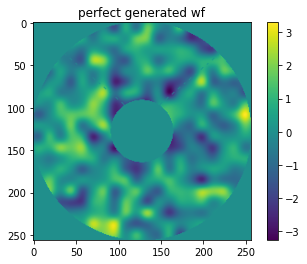

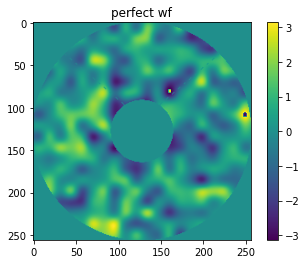

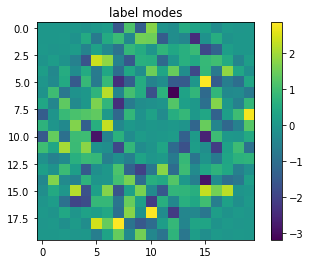

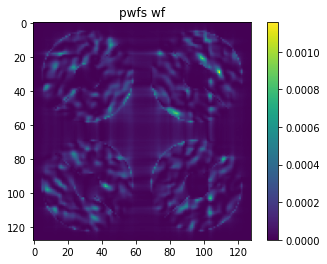

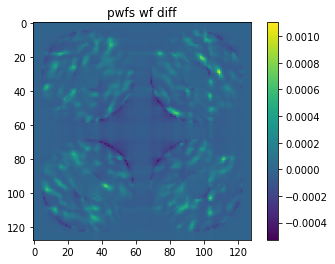

8.705293226012249e-05


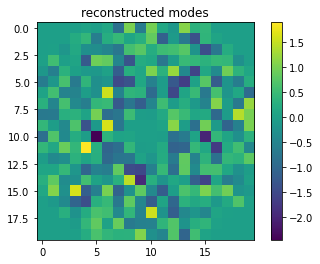

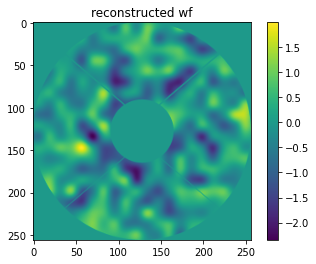

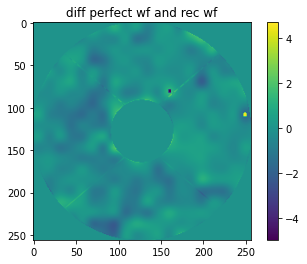

(1000, 128, 128)


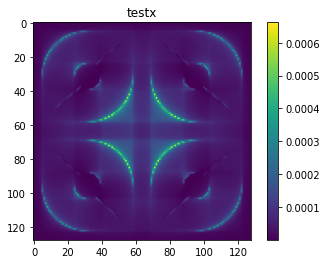

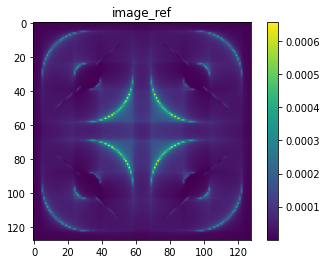

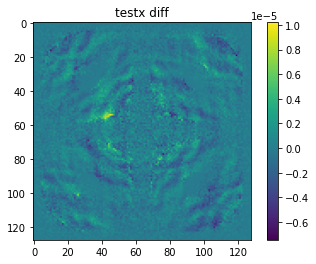

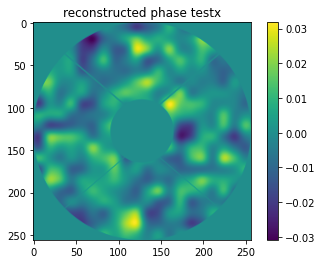

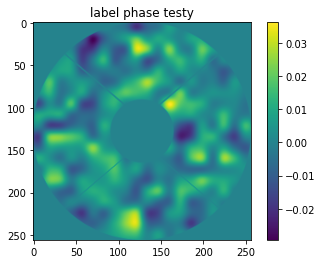

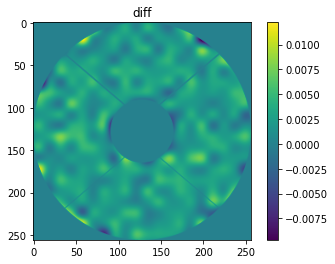

In [8]:
perfect_phase_abberation = make_phase_abberation(1)
plt.imshow(perfect_phase_abberation.reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("perfect generated wf")
plt.colorbar()
plt.show()

perfect_wf = Wavefront(aperture * np.exp(1j * perfect_phase_abberation), wavelength_wfs)
label_modes = np.matmul(perfect_phase_abberation, wf_to_modes.T)
plt.imshow(perfect_wf.phase.reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("perfect wf")
plt.colorbar()
plt.show()

plt.imshow(label_modes.reshape(20, 20))
plt.title("label modes")
plt.colorbar()
plt.show()


if use_modulation:
  image = mpwfs.forward(perfect_wf)
  image = modavg(image).reshape(num_pwfs_pixels, num_pwfs_pixels)
else:
  image = pwfs.forward(perfect_wf).intensity.reshape(num_pwfs_pixels, num_pwfs_pixels)
  image /= np.sum(image)
image = np.random.poisson(image*nr_photons)
image = image / np.sum(image)
plt.imshow(image)
plt.title("pwfs wf")
plt.colorbar()
plt.show()

plt.imshow((image - image_ref))
plt.title("pwfs wf diff")
plt.colorbar()
plt.show()
print(np.std(image))

reconstructed_modes = np.matmul((image - image_ref).flatten(), matrix.transpose())
plt.imshow(reconstructed_modes.reshape(20, 20))
plt.title("reconstructed modes")
plt.colorbar()
plt.show()

reconstructed_wf = np.matmul(modes_to_wf, reconstructed_modes)*aperture
plt.imshow(reconstructed_wf.reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("reconstructed wf")
plt.colorbar()
plt.show()

plt.imshow((reconstructed_wf-perfect_wf.phase).reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("diff perfect wf and rec wf")
plt.colorbar()
plt.show()


########
index = 0
print(testx.shape)
image = np.random.poisson(testx[index]*nr_photons)
image = image / np.sum(image)
plt.imshow(image)
plt.title("testx")
plt.colorbar()
plt.show()

plt.imshow(image_ref.reshape(num_pwfs_pixels, num_pwfs_pixels))
plt.title("image_ref")
plt.colorbar()
plt.show()

plt.imshow((image-image_ref).reshape(num_pwfs_pixels, num_pwfs_pixels))
plt.title("testx diff")
plt.colorbar()
plt.show()



reconstructed_modes = np.matmul((image - image_ref).reshape(num_pwfs_pixels**2), matrix.transpose())
reconstructed_wf = np.matmul(reconstructed_modes, modes_to_wf.transpose())*aperture#meter
plt.imshow(reconstructed_wf.reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("reconstructed phase testx")
plt.colorbar()
plt.show()

label_phases = np.matmul(testy, modes_to_wf.transpose())
plt.imshow((label_phases[index]*aperture).reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("label phase testy")
plt.colorbar()
plt.show()

plt.imshow((label_phases[index]*aperture - reconstructed_wf).reshape(num_pupil_pixels, num_pupil_pixels))
plt.title("diff")
plt.colorbar()
plt.show()


#Plot response

In [ ]:
#plot response
def response(mode, aberration_amp=0):
  inputs = np.linspace(-1, 1, 20)
  outputs = []
  aberrated_wf = make_aberrated_wf(aberration_amp)
  for i in inputs:
    if zernike:
      modes = np.matmul(wf_to_modes, aberrated_wf.phase*wavelength_wfs/(2*np.pi))
      modes[mode] = i * wavelength_wfs/(2*np.pi)
      deformable_mirror.actuators = modes
      wf_in = deformable_mirror.forward(wf_flat)
      if use_modulation:
        wfs_wf = mpwfs.forward(wf_in)
        image = modavg(wfs_wf)
      else:
        wfs_wf = pwfs.forward(wf_in)
        image = wfs_wf.intensity
        image /= np.sum(image)
      mvmprediction = np.matmul(matrix, image-image_ref)
      outputs.append(mvmprediction[mode] / wavelength_wfs * (2*np.pi))
      # plt.imshow(wf_in.phase.reshape(256, 256))
      # plt.colorbar()
      # plt.show()
      # deformable_mirror.actuators = mvmprediction
      # wf_in = deformable_mirror.forward(wf_flat)
      # plt.imshow(wf_in.phase.reshape(256, 256))
      # plt.colorbar()
      # plt.show()
      
    else:
      amplitude = i * wavelength_wfs /(2*np.pi) * aberration_amp
      aberration = np.random.randn(np.sqrt(num_modes), np.sqrt(num_modes)).flatten() * amplitude

      amplitude = i * wavelength_wfs /(2*np.pi)
      amps = np.zeros((num_modes,))
      # amps = aberration
      amps[int((num_modes)/2) - 5] = amplitude
      deformable_mirror.actuators = amps
      dm_wf = deformable_mirror.forward(wf_flat)
      amplitude = rms*wavelength_wfs/(2*np.pi)
      aberration = np.random.randn(np.sqrt(num_modes), np.sqrt(num_modes)).flatten() * amplitude
      deformable_mirror.actuators = aberration
      wf_in = deformable_mirror.forward(wf_flat)
      if use_modulation:
        wfs_wf = mpwfs.forward(wf_in)
        image = modavg(wfs_wf)
      else:
        wfs_wf = pwfs.forward(wf_in)
        image = wfs_wf.intensity
        image /= np.sum(image)
      matrixprediction = np.matmul(matrix, image - image_ref)
      output = matrixprediction[int((num_modes)/2)-5] / wavelength_wfs *(2*np.pi)
      outputs.append(output)
  return inputs, outputs



# plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls="dashed", lw=1)
# for aberrationamp in [0, 0.1, 0.5, 1, 1.5, 2, 2.5]:
#   response()(aberrationamp)
# plt.legend()
# plt.show()

# for mode in range(8):
#   inputs, outputs = response(mode, 0.5)
#   plt.plot(inputs, outputs, label="mode {}".format(mode))
#   print(mode)
# plt.plot(np.linspace(-0.5, 0.5, 10), np.linspace(-0.5, 0.5, 10), ls="dashed", color="black")
# plt.legend()
# plt.savefig("response_zernikemodes.png", dpi=500)
# plt.show()

# response(2, 0.1)

inputs, outputs1 = response(6, 0)
outputs2 = np.zeros(20)
for i in range(10):
  inputs, outputs = response(6, 0.5)
  outputs2 += outputs
outputs2 /= 10


/usr/local/lib/python3.8/dist-packages/hcipy/optics/aberration.py:37: RuntimeWarning: divide by zero encountered in power
  res = Field(grid.as_('polar').r**exponent, grid)


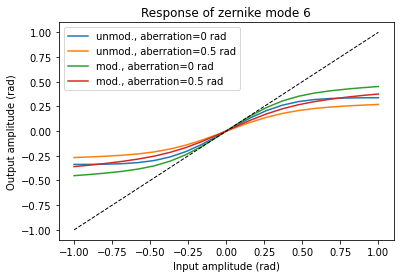

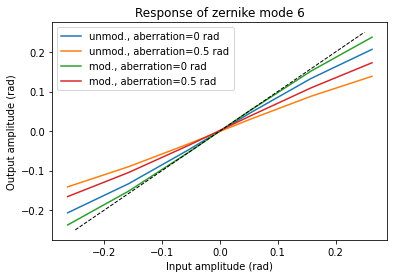

In [ ]:
plt.plot(inputs, outputs1, label="unmod., aberration=0 rad")
plt.plot(inputs, outputs2, label="unmod., aberration=0.5 rad")
plt.plot(inputs, outputs3, label="mod., aberration=0 rad")
plt.plot(inputs, outputs4, label="mod., aberration=0.5 rad")
plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls="dashed", lw=1, color="black")
plt.legend()
plt.xlabel("Input amplitude (rad)")
plt.ylabel("Output amplitude (rad)")
plt.title("Response of zernike mode 6")
plt.savefig("response.png", dpi=500)
plt.show()

plt.plot(inputs[7:13], outputs1[7:13], label="unmod., aberration=0 rad")
plt.plot(inputs[7:13], outputs2[7:13], label="unmod., aberration=0.5 rad")
plt.plot(inputs[7:13], outputs3[7:13], label="mod., aberration=0 rad")
plt.plot(inputs[7:13], outputs4[7:13], label="mod., aberration=0.5 rad")
plt.plot(np.linspace(-0.25, 0.25, 10), np.linspace(-0.25, 0.25, 10), ls="dashed", lw=1, color="black")
plt.legend()
plt.xlabel("Input amplitude (rad)")
plt.ylabel("Output amplitude (rad)")
plt.title("Response of zernike mode 6")
plt.savefig("response_zoom.png", dpi=500)
plt.show()


#Model from paper

In [ ]:
#PAPER MODEL
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), data_format="channels_last"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", strides=2, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(4, (1, 1), padding="same"))
model.add(keras.layers.BatchNormalization())
# model.add(layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(400, activation="linear", kernel_regularizer=keras.regularizers.L1(l1=1e-6)))
model.summary()

model.compile(
    loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[keras.metrics.MeanSquaredError()],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        1184      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       1

#Model from me

In [79]:
#MY MODEL

model = keras.models.Sequential()
model.add(keras.Input(shape=(int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4)))
# model.add(keras.layers.Conv2D(64, (3, 3), padding="same"))
# model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Conv2D(128, (3, 3), strides=2, padding="same"))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Conv2D(8, (1, 1), padding="same"))
# model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(1024, kernel_regularizer=keras.regularizers.L1L2(l1=1e-6, l2=1e-4)))
# model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(400,activation="linear", kernel_regularizer=keras.regularizers.L1L2(l1=1e-6, l2=1e-4)))
model.summary()

def loss_func(y_true, y_pred):
  top = keras.backend.mean(keras.backend.square(y_true - y_pred), axis=1)
  bottom = keras.backend.mean(keras.backend.square(y_true), axis=1) + 0.03
  loss = top / bottom
  return loss


model.compile(
    loss=loss_func,#keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9),
    metrics=[keras.metrics.MeanSquaredError()],
)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 16384)             0         
                                                                 
 dense_15 (Dense)            (None, 400)               6554000   
                                                                 
Total params: 6,554,000
Trainable params: 6,554,000
Non-trainable params: 0
_________________________________________________________________


#Callbacks

In [32]:
class debugCallback(keras.callbacks.Callback):
  def __init__(self):
    self.losses = []
    self.vallosses = []
    self.epochs = []
  def on_epoch_end(self, epoch, logs=None):
    self.losses.append(logs["loss"])
    self.vallosses.append(logs["val_loss"])
    self.epochs.append(epoch)
    index = np.random.randint(0, len(trainx))
    if epoch%20==0:
      clear_output()
      print("Epoch {}".format(epoch))
      self.plot_losses()
      self.plot_reconstruct(train=True)
  
  def plot_losses(self):
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.vallosses, label="val_loss")
    plt.yscale("log")
    plt.legend()
    plt.title("losses")
    plt.show()


  def plot_reconstruct(self, train=False):
    print("Wavefronts from training set")
    index = np.random.choice(range(200, 400))
    if train:
      pwfs_img = trainx[index] - image_ref
      label_modes = trainy[index]
    else:
      pwfs_img = testx[index] - image_ref
      label_modes = testy[index]
    label_wf = np.matmul(modes_to_wf, label_modes)
    data = split_pwfs_img(pwfs_img[None,:])
    data = data / globaldatascaling
    rec_modes = self.model.predict(data)
    rec_wf = np.matmul(rec_modes, modes_to_wf.transpose())
    print("rms = {:.03f} rad".format(rmslist[int(index/nr_runs)]))

    fig = plt.figure(figsize=(8, 8))

    plt.subplot(3, 2, 1)
    plt.imshow(label_modes.reshape(20, 20))
    plt.title("label")
    plt.colorbar()
    plt.subplot(3, 2, 2)
    plt.imshow(rec_modes.reshape(20, 20))
    plt.title("from cnn")
    plt.colorbar()
    plt.subplot(3, 2, 3)
    plt.imshow((label_modes - rec_modes).reshape(20, 20))
    plt.title("diff modes")
    plt.colorbar()


    plt.subplot(3, 2, 4)
    plt.imshow(((label_wf - rec_wf)*aperture).reshape(num_pupil_pixels, num_pupil_pixels))
    plt.title("diff wf")
    plt.colorbar()

    plt.subplot(3, 2, 5)
    plt.imshow((label_wf*aperture).reshape(num_pupil_pixels, num_pupil_pixels))
    plt.title("label")
    plt.colorbar()

    plt.subplot(3, 2, 6)
    plt.imshow((rec_wf*aperture).reshape(num_pupil_pixels, num_pupil_pixels))
    plt.title("from cnn")
    plt.colorbar()

    plt.show()

#Fit model

In [31]:
globaldatascaling = np.std(trainx)

Epoch 580


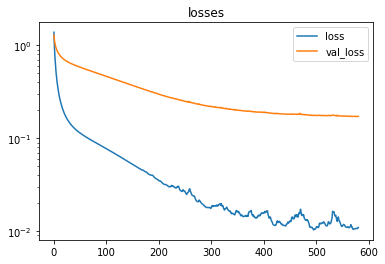

Wavefronts from training set
1/1 [==============================] - 0s 35ms/step
rms = 0.055 rad


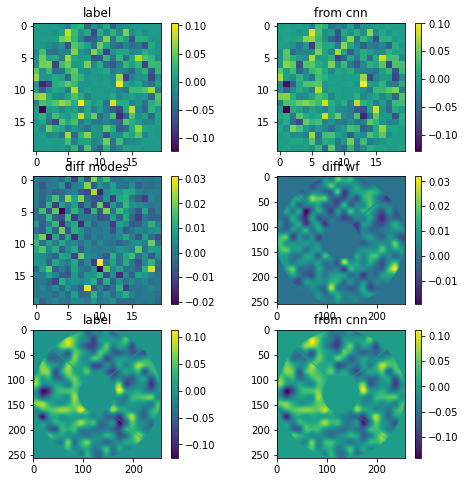

Epoch 598: early stopping
{'verbose': 0, 'epochs': 600, 'steps': 13}


In [80]:
#FIT MODEL
callback = keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=20)
debug = debugCallback()


#shuffle data
data = split_pwfs_img(trainx - image_ref)
shuffle_indices = np.arange(len(trainx))
np.random.shuffle(shuffle_indices)
data = data[shuffle_indices]
labels = trainy[shuffle_indices]
# datavars = np.std(data, axis=(1, 2))
# data = data / datavars[:,None,None,:]
data = data / globaldatascaling
labels = labels



history = model.fit(data,
                    labels,
                    epochs=600,
                    batch_size=64,
                    shuffle=True,
                    validation_split=0.2,
                    callbacks=[callback, debug],
                    verbose=0)
# history = model.fit(data.reshape(len(data), int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), labels, epochs=200, batch_size=64, shuffle=True)
print(history.params)
model.save("./models/testmodel")

#Plot RMS

32/32 [==============================] - 0s 2ms/step
0
1
2
3
4
[[0.00065378 0.00088748 0.00228105 0.00510235 0.00960755]
 [0.00114017 0.00148216 0.00569038 0.01223753 0.0299132 ]]


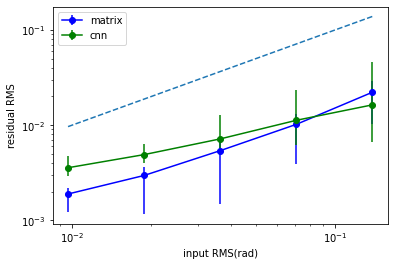

In [82]:
#make RMS plot

#make label wavefront and mvm reconstruction
images = np.random.poisson(trainx*nr_photons)
images = images/np.sum(images, axis=(1, 2))[:,None,None]

label_wf = np.matmul(trainy, modes_to_wf.transpose())*aperture
mvm_pred_modes = np.matmul((images-image_ref).reshape(len(testx), num_pwfs_pixels**2), matrix.transpose())
mvm_pred_wf = np.matmul(mvm_pred_modes, modes_to_wf.transpose())*aperture

#normalize data and make cnn reconstruction
cnn_data = split_pwfs_img(images - image_ref) #TODO change trainx to images when its ready to add noise
data_vars = np.std(cnn_data, axis=(1, 2))
cnn_data_norm = cnn_data / globaldatascaling #/ data_vars[:,None, None,:]
cnn_pred_modes = model.predict(cnn_data_norm)
cnn_pred_wf = np.matmul(cnn_pred_modes, modes_to_wf.transpose())

label_wf *= aperture
cnn_pred_wf *= aperture
mvm_pred_wf *= aperture

# for i in range(len(rmslist)):
#   plt.imshow(cnn_pred_modes[i*nr_runs].reshape(20, 20))
#   plt.colorbar()
#   plt.show()


#calculate RMS
inputs = []
mvm_outputs = []
mvm_errors = []
cnn_outputs = []
cnn_errors = []
for i in range(len(rmslist)):
    print(i)
    input_rms = get_rms(label_wf[i*nr_runs:(i+1)*nr_runs])
    matrix_rms = get_rms(mvm_pred_wf[i*nr_runs:(i+1)*nr_runs] - label_wf[i*nr_runs:(i+1)*nr_runs])
    cnn_rms = get_rms(cnn_pred_wf[i*nr_runs:(i+1)*nr_runs] - label_wf[i*nr_runs:(i+1)*nr_runs])
    inputs.append(np.mean(input_rms))
    mvm_outputs.append(np.mean(matrix_rms))
    mvm_errors.append([np.min(matrix_rms) - np.mean(matrix_rms), np.mean(matrix_rms) - np.max(matrix_rms)])
    cnn_outputs.append(np.mean(cnn_rms))
    cnn_errors.append([np.mean(cnn_rms) - np.min(cnn_rms), np.max(cnn_rms) - np.mean(cnn_rms)])
mvm_errors = np.array(mvm_errors).T
cnn_errors = np.array(cnn_errors).T
print(cnn_errors)
plt.plot(inputs, inputs, ls="dashed")
plt.errorbar(inputs, mvm_outputs, yerr=mvm_errors, marker="o", color="blue", label="matrix")
plt.errorbar(inputs, cnn_outputs, yerr=cnn_errors, marker="o", color="green", label="cnn")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("input RMS(rad)")
plt.ylabel("residual RMS")
plt.legend()
# plt.savefig("bringyourplot", dpi=500)
plt.show()

16/16 [==============================] - 0s 2ms/step


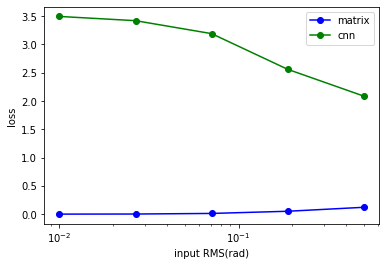

In [39]:
#make loss plot

#make label wavefront and mvm reconstruction
image = np.random.poisson(testx*nr_photons)
image = image/np.sum(image, axis=(1, 2))[:,None,None]

label_wf = np.matmul(testy, modes_to_wf.transpose())*aperture
mvm_pred_modes = np.matmul((image-image_ref).reshape(len(testx), num_pwfs_pixels**2), matrix.transpose())
mvm_pred_wf = np.matmul(mvm_pred_modes, modes_to_wf.transpose())*aperture

#normalize data and make cnn reconstruction
cnn_data = split_pwfs_img(testx - image_ref)
data_vars = np.sqrt(np.var(cnn_data, axis=(1, 2, 3)))
cnn_pred_modes = model.predict(cnn_data / data_vars[:,None, None, None])
cnn_pred_wf = np.matmul(cnn_pred_modes, modes_to_wf.transpose())

label_wf *= aperture
cnn_pred_wf *= aperture
mvm_pred_wf *= aperture

# for i in range(len(rmslist)):
#   plt.imshow((label_wf[i*nr_runs]).reshape(256, 256))
#   plt.colorbar()
#   plt.show()
#   plt.imshow((cnn_pred_wf[i*nr_runs]).reshape(256, 256))
#   plt.colorbar()
#   plt.show()
#   plt.imshow((cnn_pred_wf[i*nr_runs] - label_wf[i*nr_runs]).reshape(256, 256))
#   plt.colorbar()
#   plt.show()
#   print("------------")


#calculate RMS
inputs = []
cnnloss = []
mvmloss = []
for i in range(len(rmslist)):
  inputs = rmslist
  cnntop = np.mean((cnn_pred_modes[i*nr_runs:(i+1)*nr_runs] - testy[i*nr_runs:(i+1)*nr_runs])**2)
  cnnbot = np.mean((testy[i*nr_runs:(i+1)*nr_runs])**2) + 0.03
  cnnloss.append(cnntop/cnnbot)

  mvmtop = np.mean((mvm_pred_modes[i*nr_runs:(i+1)*nr_runs] - testy[i*nr_runs:(i+1)*nr_runs])**2)
  mvmbot = np.mean((testy[i*nr_runs:(i+1)*nr_runs])**2) + 0.03
  mvmloss.append(mvmtop/mvmbot)
# plt.hlines(1, np.min(inputs), np.max(inputs), linestyles="dashed")
plt.plot(inputs, mvmloss, marker="o", color="blue", label="matrix")
plt.plot(inputs, cnnloss, marker="o", color="green", label="cnn")
plt.xscale("log")
# plt.yscale("log")
# plt.ylim(0, 2)
plt.xlabel("input RMS(rad)")
plt.ylabel("loss")
plt.legend()
# plt.savefig("bringyourplot", dpi=500)
plt.show()

#Make closed loop animation


In [ ]:
#init
#generic atmospheric parameters
# seeing = 0.1
seeing = 0.6 # arcsec @ 500nm (convention)
outer_scale = telescope_diameter # meter
tau0 = 0.01 # seconds
fried_parameter = seeing_to_fried_parameter(seeing)
Cn_squared = Cn_squared_from_fried_parameter(fried_parameter)
# velocity = 0.314 * fried_parameter / tau0
velocity = 0
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)


#simulation parameters
gain = 0.6
leakage = 0.0001
num_iterations = 50
burn_in_iterations = 5
delta_t = 1e-3   #1 kHz

mirror_modes = np.zeros((num_modes))

propagator = FraunhoferPropagator(pupil_grid, focal_grid)
strehl_ref = propagator.forward(wf_flat).power.max()
coro = PerfectCoronagraph(aperture, 4)
long_exposure_coro = focal_grid.zeros()
long_exposure = focal_grid.zeros()

paramtext = "closed_loop_mvm_{}".format(mod_text)

def cnnreconstruction(pwfs_img):
  cnn_data = split_pwfs_img(pwfs_img[None,:])
  data_var = np.std(cnn_data)
  cnn_pred_modes = model.predict(cnn_data / data_var, verbose=0)
  return cnn_pred_modes[0]

In [ ]:
#start animation
psf_array = np.ndarray((num_iterations, num_focal_pixels**2))
long_exposure_array = np.ndarray((num_iterations, num_focal_pixels**2))
long_exposure_coro_array = np.ndarray((num_iterations, num_focal_pixels**2))
strehl_array = np.ndarray((num_iterations))
sky_array = np.ndarray((num_iterations, num_pupil_pixels**2))
for i in range(num_iterations):
  layer.t = i*delta_t
  sky_array[i] = layer.phase_for(wavelength_wfs)

  wf_atm = layer.forward(wf_flat)
  wf_mirror = np.matmul(mirror_modes, modes_to_wf.T)
  wf_dm = Wavefront(aperture*np.exp(1j * (wf_atm.phase + wf_mirror)), wavelength_wfs)
  if use_modulation:
    wf_pwfs = mpwfs.forward(wf_dm)
    wf_pwfs = modavg(wf_pwfs)
  else:
    wf_pwfs = pwfs.forward(wf_dm).intensity
    wf_pwfs /= np.sum(wf_pwfs)

  # reconstruction = np.matmul(wf_pwfs, matrix.transpose())
  reconstruction = cnnreconstruction(wf_pwfs-image_ref.flatten())
  mirror_modes = (1 - leakage) * mirror_modes - gain * reconstruction
  psf = propagator.forward(wf_dm)
  psf_coro = propagator.forward(coro.forward(wf_dm))
  long_exposure += psf.power
  long_exposure_coro += psf_coro.power

  psf_array[i] = psf.power
  long_exposure_array[i] = long_exposure/i
  long_exposure_coro_array[i] = (long_exposure_coro) / (long_exposure).max()

  strehl_array[i] = long_exposure_array[i].max() / strehl_ref

  if i%10 == 0:
    print(i, num_iterations, strehl_array[i])


<ipython-input-16-a126992354f5>:30: RuntimeWarning: divide by zero encountered in true_divide
  long_exposure_array[i] = long_exposure/i


0 50 inf
10 50 0.011567787483059587
20 50 0.005794445462577084
30 50 0.0038723077598386084
40 50 0.0029106110485576553


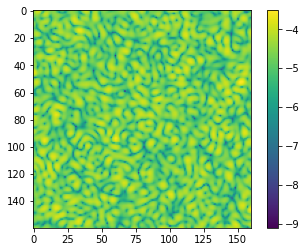

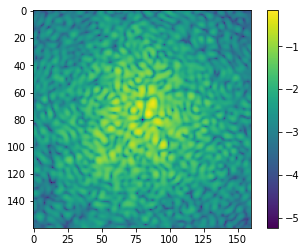

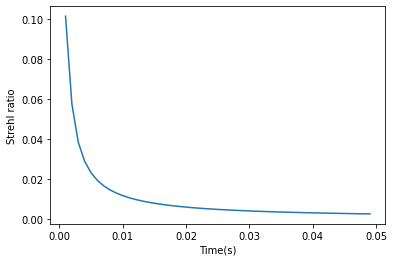

In [ ]:
#check closed loop sim
plt.imshow(np.log10(psf_array[-1]).reshape(num_focal_pixels, num_focal_pixels))
plt.colorbar()
plt.show()

plt.imshow(np.log10(long_exposure_coro_array[1]).reshape(num_focal_pixels, num_focal_pixels))
plt.colorbar()
plt.show()

plt.plot(np.arange(num_iterations)*delta_t, strehl_array)
plt.xlabel("Time(s)")
plt.ylabel("Strehl ratio")
plt.show()

<ipython-input-22-8420d297f137>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.log10(long_exposure_array[frame]/long_exposure_array[frame].max()).reshape(num_focal_pixels, num_focal_pixels), vmin=-6, vmax=0)
<ipython-input-22-8420d297f137>:22: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(long_exposure_coro_array[frame]/long_exposure_array[frame].max()).reshape(num_focal_pixels, num_focal_pixels), vmin=-6, vmax=0)


0 50
0 50
0 50


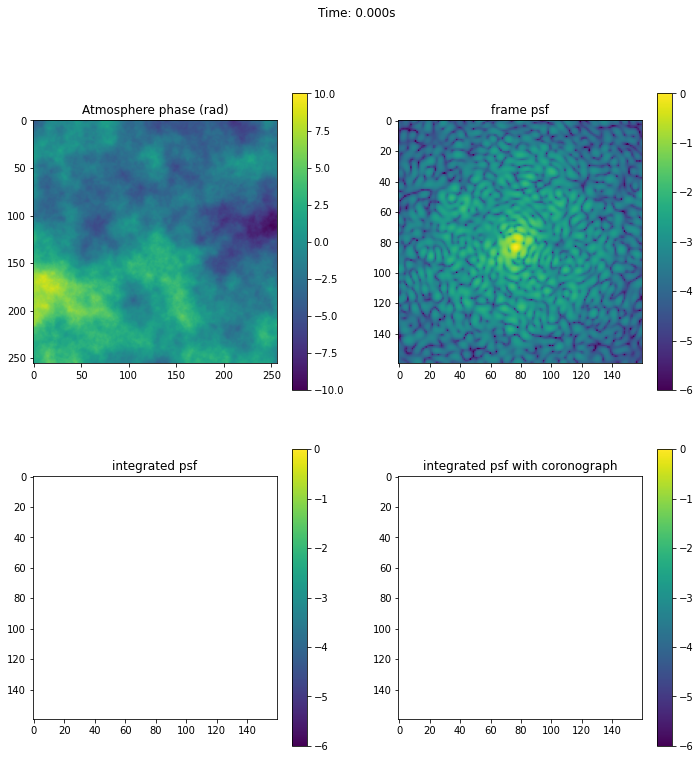

In [ ]:
def make_animation(frame):
  plt.clf()
  plt.suptitle('Time: {:.3f}s'.format(frame*delta_t))
  
  plt.subplot(2,2,1)
  plt.title("Atmosphere phase (rad)")
  plt.imshow(sky_array[frame].reshape(num_pupil_pixels, num_pupil_pixels), vmin=-10, vmax=10)
  plt.colorbar()

  plt.subplot(2,2,2)
  plt.title("frame psf")
  plt.imshow(np.log10(psf_array[frame] / psf_array[frame].max()).reshape(num_focal_pixels, num_focal_pixels), vmin=-6, vmax=0)
  plt.colorbar()

  plt.subplot(2,2,3)
  plt.title("integrated psf")
  plt.imshow(np.log10(long_exposure_array[frame]/long_exposure_array[frame].max()).reshape(num_focal_pixels, num_focal_pixels), vmin=-6, vmax=0)
  plt.colorbar()

  plt.subplot(2,2,4)
  plt.title("integrated psf with coronograph")
  plt.imshow(np.log10(long_exposure_coro_array[frame]/long_exposure_array[frame].max()).reshape(num_focal_pixels, num_focal_pixels), vmin=-6, vmax=0)
  plt.colorbar()

  

  if frame%50 == 0:
    print(frame, num_iterations)


fig = plt.figure(figsize=(12,12))
anim = animation.FuncAnimation(fig, make_animation, frames=num_iterations)
simulation_time = 3 #num_iterations * delta_t
writer = animation.FFMpegWriter(fps=num_iterations/simulation_time)
anim.save("{}.mp4".format(paramtext), writer=writer)

#closed loop per frame

[ 1.80200546e-19  2.93524446e-07  1.19179515e-04  1.57634658e-02
  1.60340304e-01 -1.22190883e-01 -2.82531239e-01 -1.68622325e-01
 -4.17872578e-01  3.78940490e-02 -6.31256604e-01 -7.34369933e-01
 -7.05265553e-01 -5.70811688e-01 -6.21595203e-02 -1.55463148e-01
 -7.92619094e-03  4.09767523e-05  3.67275736e-07 -1.78076805e-16]


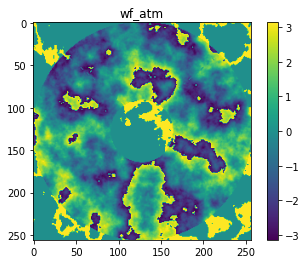

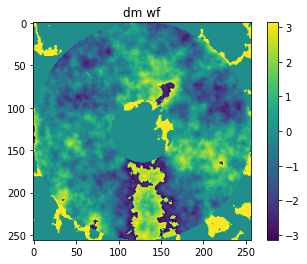

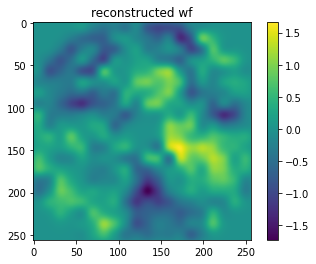

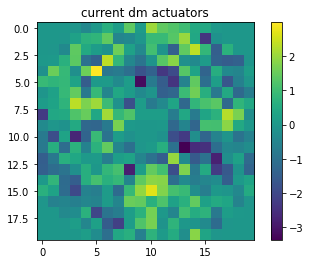

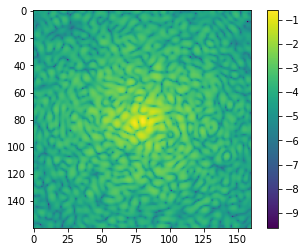

In [ ]:
#calc 1 frame
wf_atm = layer.forward(wf_flat)
# modes_atm = np.matmul(wf_atm.phase, wf_to_modes.transpose())
wf_mirror = np.matmul(mirror_modes, modes_to_wf.T)
wf_dm = Wavefront(aperture*np.exp(1j * (wf_atm.phase + wf_mirror)), wavelength_wfs)
# plt.imshow((wf_atm.phase - wf_mirror).reshape(256, 256))
# plt.colorbar()
# plt.show()
# plt.imshow((wf_mirror).reshape(256, 256))
# plt.colorbar()
# plt.show()
# plt.imshow((wf_atm.phase).reshape(256, 256))
# plt.colorbar()
# plt.show()
# modes_dm = np.matmul(wf_dm.phase, wf_to_modes.transpose())
if use_modulation:
  wf_pwfs = mpwfs.forward(wf_dm)
  wf_pwfs = modavg(wf_pwfs)
else:
  wf_pwfs = pwfs.forward(wf_dm).intensity
  wf_pwfs /= np.sum(wf_pwfs)

reconstruction = np.matmul(wf_pwfs, matrix.transpose())
print(reconstruction[:20])
# reconstruction = cnnreconstruction(wf_pwfs-image_ref.flatten())
mirror_modes = (1 - leakage) * mirror_modes - gain * reconstruction

psf = propagator.forward(wf_dm)


plt.imshow(wf_atm.phase.reshape(256, 256))
plt.colorbar()
plt.title("wf_atm")
plt.show()

plt.imshow(wf_dm.phase.reshape(256, 256))
plt.colorbar()
plt.title("dm wf")
plt.show()

plt.imshow(np.matmul(reconstruction, modes_to_wf.T).reshape(256, 256))
plt.colorbar()
plt.title("reconstructed wf")
plt.show()

plt.imshow(mirror_modes.reshape(20, 20))
plt.colorbar()
plt.title("current dm actuators")
plt.show()



plt.imshow(np.log10(psf.power.reshape(num_focal_pixels, num_focal_pixels)))
plt.colorbar()
plt.show()


#rest, debug

In [ ]:
data = split_pwfs_img(trainx - image_ref)

datavars = np.std(data, axis=(1, 2, 3))
data = data / (datavars[:,None,None, None])
labels = trainy / modes_std

print(np.std(labels[400]))

# plt.imshow(labels[400])

0.09802272515492258


In [ ]:
print(rmslist[2])

0.03786479009414649
